# Introduction

The goal of this project is to predict house prices using machine learning techniques, specifically Linear Regression and Random Forest Regression. The project involves exploring a dataset containing various features associated with house listings and their corresponding prices. The dataset has been preprocessed, analyzed, and used to train and evaluate both regression models. The primary objective is to compare the performance of these models and determine which one yields better predictive accuracy for house prices.

# Importing Libraries

In [49]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, r2_score, confusion_matrix, mean_squared_error

import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

In [50]:
data = pd.read_csv(r"C:/Users/zaid arman/Desktop/Internship/TechnoHackes Internship/Task1 - House Price Prediction/Dataset - House Price Prediction/kc_house_data.csv")

# Data Exploration

In [51]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [52]:
data.tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,20141015T000000,325000.0,2,0.75,1020,1076,2.0,0,0,...,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [53]:
data.shape

(21613, 21)

In [54]:
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [55]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [56]:
#To get statistics about the dataframe
data.describe(include='all')

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
unique,NaN,372,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,20140623T000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,142,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,4.580302e+09,NaN,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,...,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,NaN,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,...,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,NaN,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,...,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,NaN,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,...,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,NaN,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,...,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,NaN,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,...,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000


In [57]:
data.describe

<bound method NDFrame.describe of                id             date     price  bedrooms  bathrooms  \
0      7129300520  20141013T000000  221900.0         3       1.00   
1      6414100192  20141209T000000  538000.0         3       2.25   
2      5631500400  20150225T000000  180000.0         2       1.00   
3      2487200875  20141209T000000  604000.0         4       3.00   
4      1954400510  20150218T000000  510000.0         3       2.00   
...           ...              ...       ...       ...        ...   
21608   263000018  20140521T000000  360000.0         3       2.50   
21609  6600060120  20150223T000000  400000.0         4       2.50   
21610  1523300141  20140623T000000  402101.0         2       0.75   
21611   291310100  20150116T000000  400000.0         3       2.50   
21612  1523300157  20141015T000000  325000.0         2       0.75   

       sqft_living  sqft_lot  floors  waterfront  view  ...  grade  \
0             1180      5650     1.0           0     0  ...      7 

In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [59]:
data.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

### Handling Missing Values

In [60]:
data.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [61]:
# To get missing value percentage
percentage_missing=data.isnull().sum()*100/len(data)
print(percentage_missing)

id               0.0
date             0.0
price            0.0
bedrooms         0.0
bathrooms        0.0
sqft_living      0.0
sqft_lot         0.0
floors           0.0
waterfront       0.0
view             0.0
condition        0.0
grade            0.0
sqft_above       0.0
sqft_basement    0.0
yr_built         0.0
yr_renovated     0.0
zipcode          0.0
lat              0.0
long             0.0
sqft_living15    0.0
sqft_lot15       0.0
dtype: float64


So, if we see we haven't missing values, now we are trying to find duplicate valuse

In [62]:
#Check for duplicate data
duplicate_data=data.duplicated().any()
duplicate_data

False

True = Yes, the dataset contain duplicate values

False = No, the dataset haven't duplicate values

In [63]:
#To find the number of unique values
data["price"].nunique()

4028

In [64]:
data["grade"].nunique()

12

In [65]:
data["price"].value_counts()

350000.0     172
450000.0     172
550000.0     159
500000.0     152
425000.0     150
            ... 
607010.0       1
1362500.0      1
298800.0       1
957500.0       1
402101.0       1
Name: price, Length: 4028, dtype: int64

### Checking Outliers

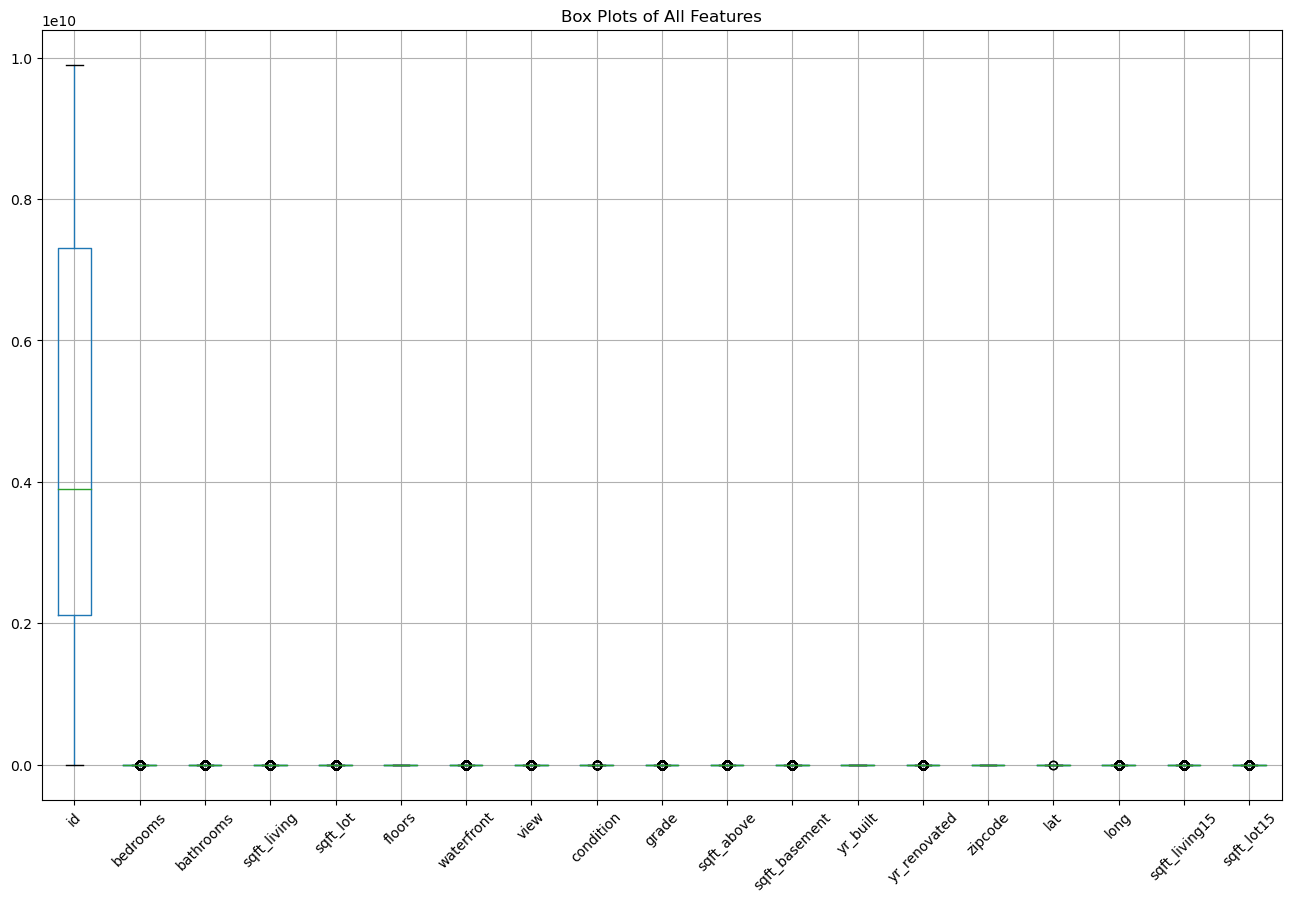

In [66]:
# checking outliers for all columns
features_to_check = data.drop(columns=['price', 'date'])

# Create box plots to visualize potential outliers
plt.figure(figsize=(16, 10))
features_to_check.boxplot()
plt.title('Box Plots of All Features')
plt.xticks(rotation=45)
plt.show()

# Visualization

In [67]:
data.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016762,0.001286,0.005160,-0.012258,-0.132109,0.018525,-0.002721,0.011592,-0.023783,0.008130,-0.010842,-0.005151,0.021380,-0.016907,-0.008224,-0.001891,0.020799,-0.002901,-0.138798
price,-0.016762,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.001286,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.005160,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,-0.012258,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,-0.132109,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.018525,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,-0.002721,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.011592,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,-0.023783,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406


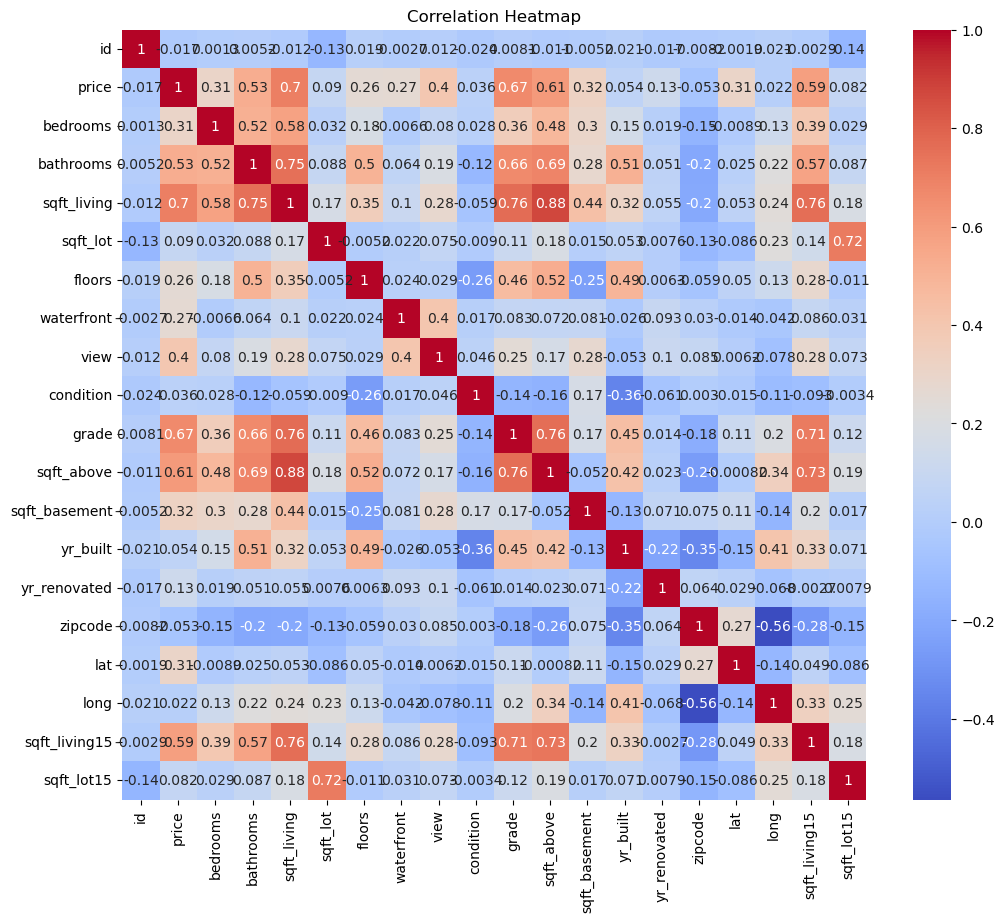

In [68]:
plt.figure(figsize=(12, 10))  # Adjust width and height as needed
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

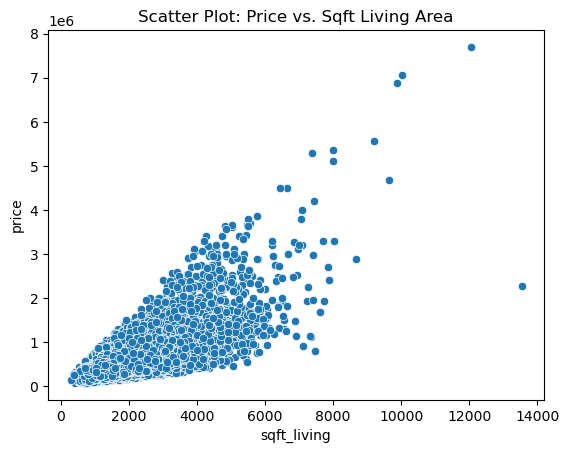

In [69]:
sns.scatterplot(x='sqft_living', y='price', data=data)
plt.title('Scatter Plot: Price vs. Sqft Living Area')
plt.show()

# Split the Dataset

there are non-numeric values in your dataset that the StandardScaler is unable to convert to floats.
Since the 'date' column is not a numerical feature that can be directly used in regression models. One common approach is to drop date features from the date.

In [70]:
# Split the dataset into features (X) and target (y)
X = data.drop(columns=['price', 'date'])
y = data['price']

In [71]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=111)

In [72]:
# Identify constant columns
constant_columns = X_train.columns[X_train.std() == 0]

# Drop constant columns from the training and testing sets
X_train = X_train.drop(columns=constant_columns)
X_test = X_test.drop(columns=constant_columns)

### StandardScaler

In [73]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# LInear Regression

In [74]:
# Create a LinearRegression model and fit it to the training data
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)

LinearRegression()

In [75]:
# Get the model's coefficients and intercept
coeff_df = pd.DataFrame(linear_model.coef_, X.columns, columns=['Coefficient'])
print(coeff_df)

                 Coefficient
id              -2727.655068
bedrooms       -31646.085913
bathrooms       34892.414527
sqft_living     73618.286195
sqft_lot         6091.189968
floors           4030.542579
waterfront      48935.805024
view            43291.260811
condition       15851.763924
grade          111162.163595
sqft_above      68900.119928
sqft_basement   23961.333538
yr_built       -76051.856866
yr_renovated     7608.077447
zipcode        -29427.117799
lat             82692.840520
long           -28285.318755
sqft_living15   22165.458962
sqft_lot15      -9082.298165


In [76]:
print("Intercept:", linear_model.intercept_)

Intercept: 537946.9680084633


### Prediction

In [77]:
# Make predictions on the test set
linear_predictions = linear_model.predict(X_test_scaled)

In [78]:
print(linear_model.intercept_)

537946.9680084633


### Evaluation

In [79]:
# Evaluate the model using Mean Squared Error
linear_mse = mean_squared_error(y_test, linear_predictions)
print("Mean Squared Error:", linear_mse)

Mean Squared Error: 45595849468.30183


In [80]:
# Calculate Root Mean Squared Error (RMSE)
linear_rmse = np.sqrt(linear_mse)
print("Root Mean Squared Error:", linear_rmse)

Root Mean Squared Error: 213531.8464967271


In [81]:
# Calculate R-squared (coefficient of determination)
linear_r2 = r2_score(y_test, linear_predictions)
print("R-squared:", linear_r2)

R-squared: 0.6940920228750358


An R-squared value of 0.695 means that the model can explain around 69.5% of the variability in the house prices using the selected features, which is a positive sign but Not good. 

# Random Forest

In [82]:
# Create a Random Forest Regressor model
RF_model = RandomForestRegressor(n_estimators=99, random_state=111)  # You can adjust n_estimators and other parameters

In [83]:
# Train the model
RF_model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=99, random_state=111)

### Prediction

In [84]:
# Make predictions
RF_predictions = RF_model.predict(X_test)

### Evaluation

In [85]:
RF_mse = mean_squared_error(y_test, RF_predictions)
print("Mean Squared Error:", RF_mse)

Mean Squared Error: 18570353770.19057


In [86]:
RF_r2 = r2_score(y_test, RF_predictions)
print("R-squared:", RF_r2)

R-squared: 0.8754092878501311


This is a substantial improvement compared to the previous linear regression attempts, indicating that the Random Forest model is capturing the underlying patterns in the data more effectively.



# Comparing

In [87]:
# Display results
print("**** Linear Regression ****")
print("     Mean Squared Error:", linear_mse)
print("     R-squared:", linear_r2)
print()

print("**** Random Forest Regression ****")
print("     Mean Squared Error:", RF_mse)
print("     R-squared:", RF_r2)

**** Linear Regression ****
     Mean Squared Error: 45595849468.30183
     R-squared: 0.6940920228750358

**** Random Forest Regression ****
     Mean Squared Error: 18570353770.19057
     R-squared: 0.8754092878501311


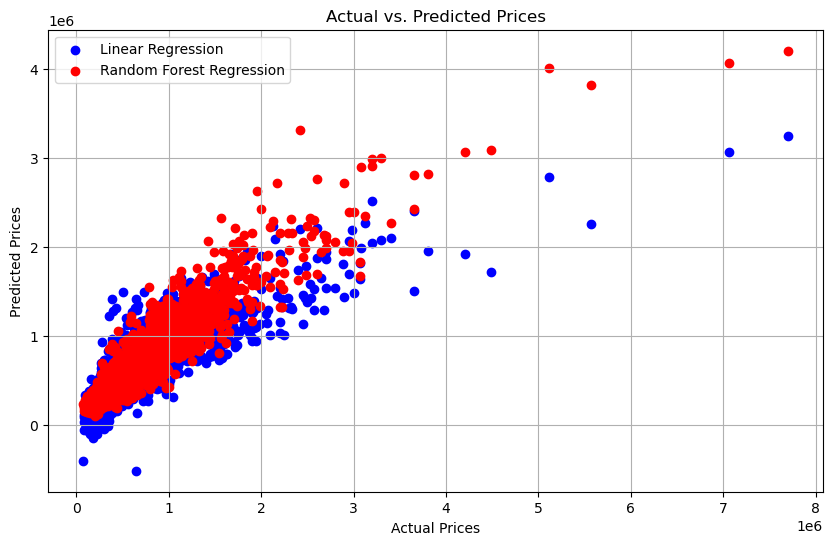

In [88]:
# Create a scatter plot to compare predictions
plt.figure(figsize=(10, 6))

plt.scatter(y_test, linear_predictions, color='blue', label='Linear Regression')
plt.scatter(y_test, RF_predictions, color='red', label='Random Forest Regression')

plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs. Predicted Prices')
plt.legend()
plt.grid(True)
plt.show()

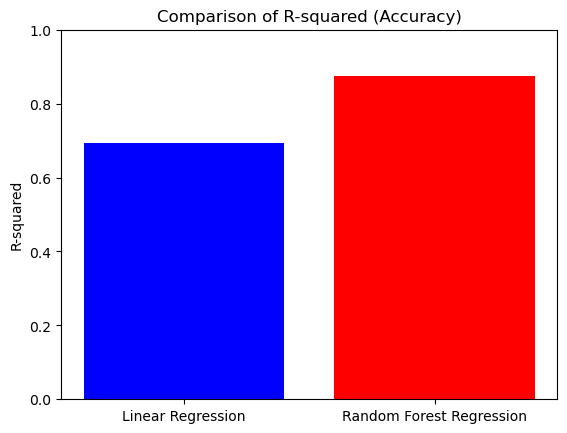

In [89]:
# Create a bar plot to compare R-squared values
models = ['Linear Regression', 'Random Forest Regression']
r2_values = [linear_r2, RF_r2]

plt.bar(models, r2_values, color=['blue', 'red'])
plt.ylabel('R-squared')
plt.title('Comparison of R-squared (Accuracy)')
plt.ylim(0, 1)  # Set y-axis limits to 0 and 1
plt.show()

## Conclusion

In summary, the comparison between Linear Regression and Random Forest Regression models on the house price dataset indicates that the Random Forest model outperforms Linear Regression. The Random Forest's higher R-squared value (around 0.87) suggests it better captures the variance in house prices. The scatter plot visualization reinforces this, showcasing how closely the Random Forest's predictions align with actual prices. Therefore, for accurate house price predictions, the Random Forest Regression model is a preferable choice over Linear Regression.